In [4]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt 

# examples of frequency and time data

In [26]:
Fs = 150.0; # sampling rate 
Ts = 1.0/Fs; # sampling interval 
t = np.arange(0,1,Ts) # time vector 
ff1 = 5; # frequency of the signal 1 
ff2 = 10; # frequency of the signal 2 
y = np.sin(2*np.pi*ff1*t) + np.sin(3*np.pi*ff2*t)

Text(0, 0.5, 'amplitude')

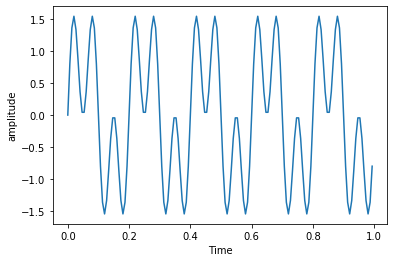

In [30]:
fig, ax = plt.subplots()

ax.plot(t,y)
ax.set_xlabel('Time')
ax.set_ylabel('amplitude')


(-5, 110)

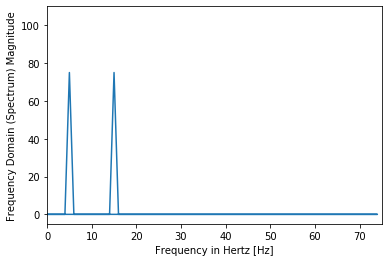

In [31]:
from scipy import fftpack

X = fftpack.fft(y)
freqs = fftpack.fftfreq(len(y)) * Fs

fig, ax = plt.subplots()

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, Fs / 2)
ax.set_ylim(-5, 110)

# High/low frequency

(Text(0.5, 1.0, 'After FFT'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

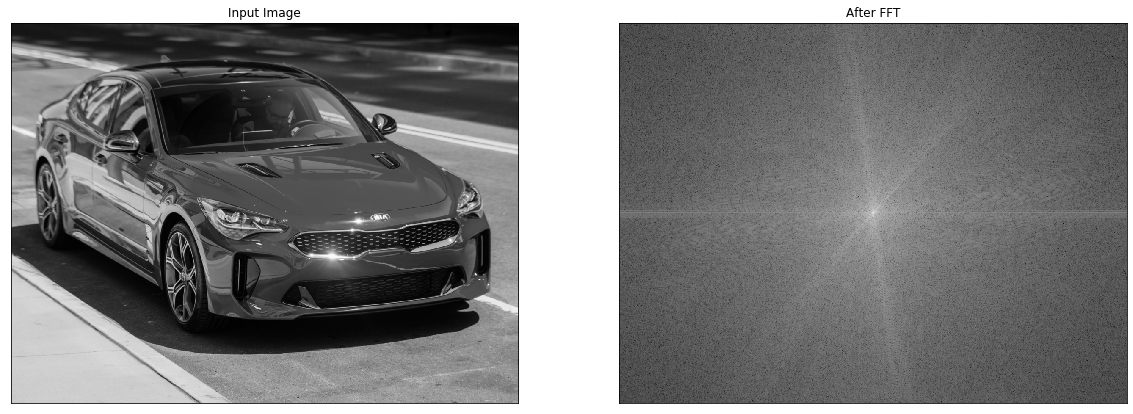

In [46]:
img = cv2.imread('car.png', 0) 
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft) 
magnitude_spectrum = 20 *    np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])) 
plt.figure(figsize=(20,20)) 
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])

# edge detection

In [48]:
# Circular HPF mask, center circle is 0, remaining all ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


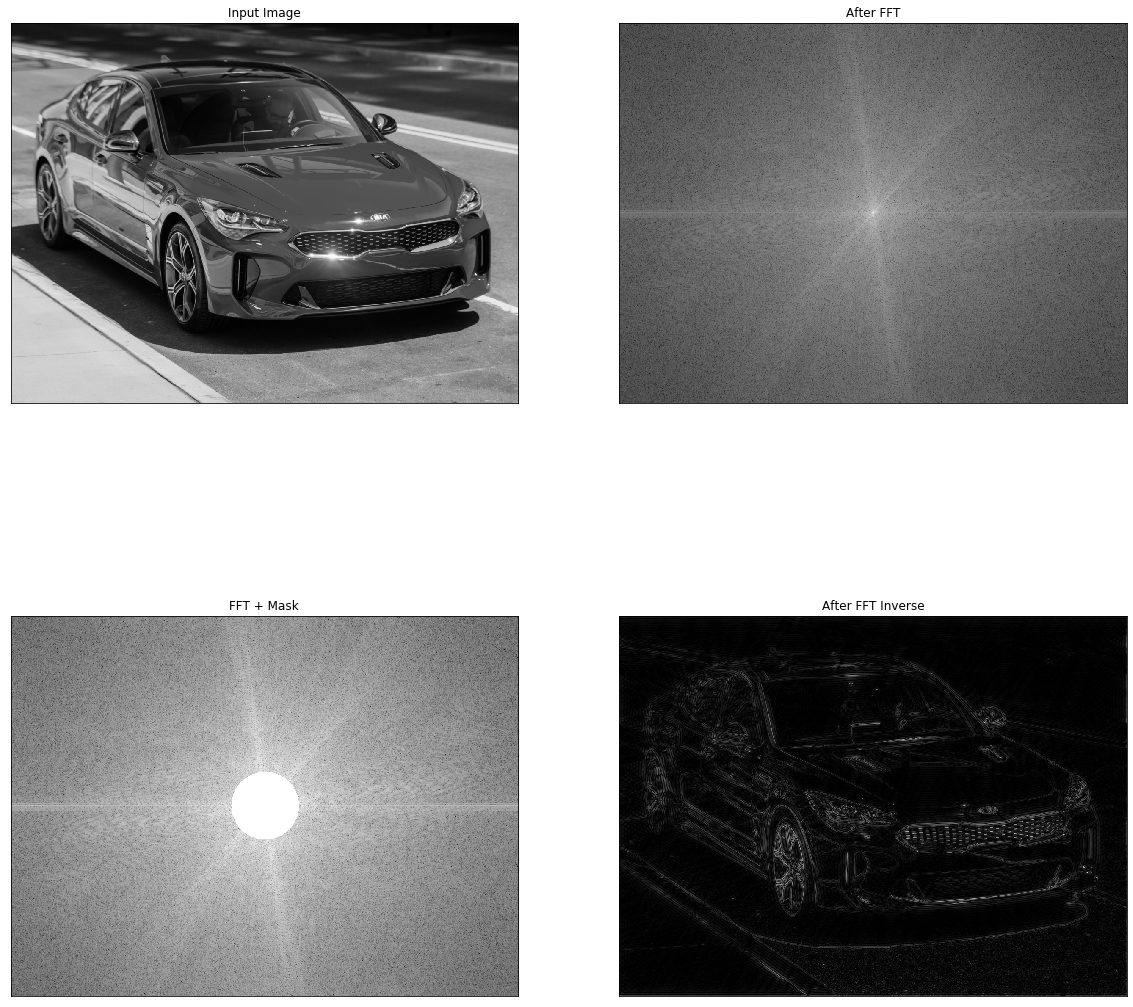

In [49]:
# apply mask and inverse DFT 
fshift = dft_shift * mask 
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1])) 
f_ishift = np.fft.ifftshift(fshift) 
img_back = cv2.idft(f_ishift) 
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
plt.figure(figsize=(20,20)) 
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray') 
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(fshift_mask_mag, cmap='gray') 
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(img_back, cmap='gray') 
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()